In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
np.random.seed(42)

In [4]:
df_b=pd.read_csv('df_behaviour.csv',delimiter=',')
df_d=pd.read_csv('df_demo.csv',delimiter=',')
df_p=pd.read_csv('df_psy.csv',delimiter=',')

# BEHAVIOUR SEGMENT

In [5]:
metric_features_b=df_b.columns

In [7]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_b)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_b, cluster_labels)
    avg_silhouette.append(silhouette_avg)


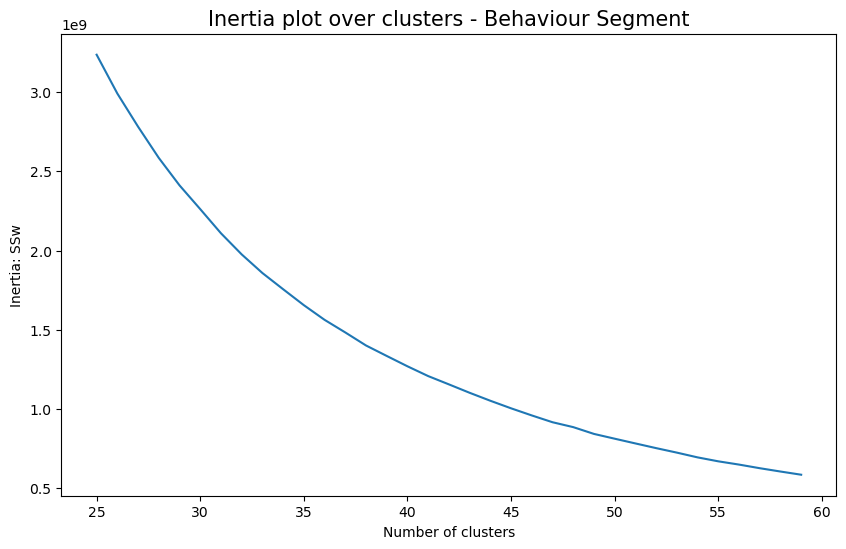

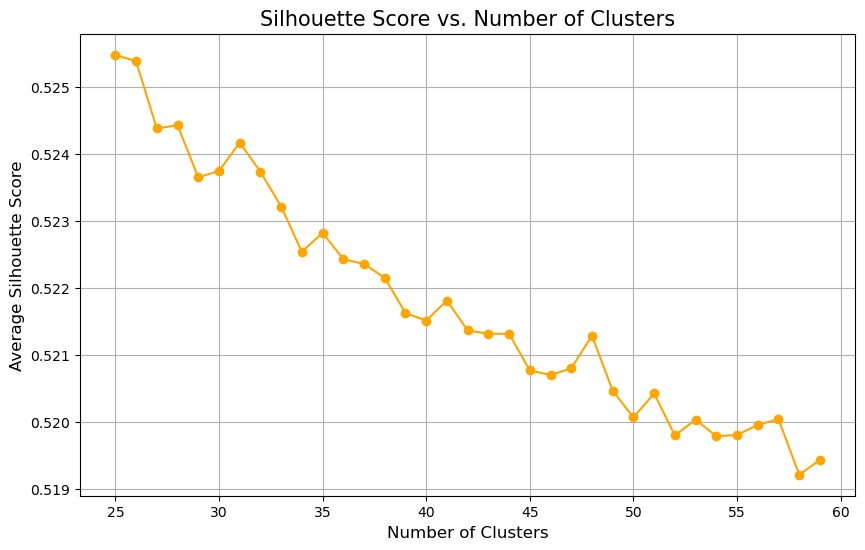

In [8]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Behaviour Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=43, random_state=42)
kmeans_labels = kmeans.fit_predict(df_b)
centroids_b = kmeans.cluster_centers_

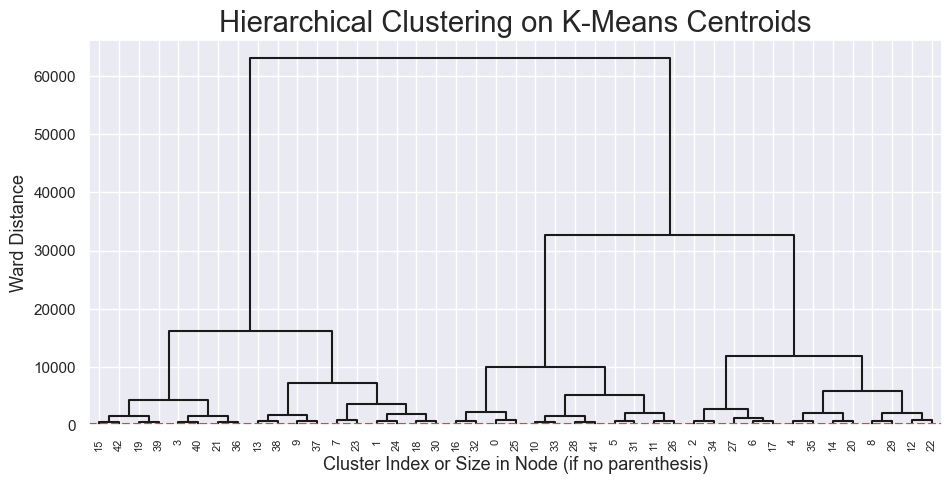

In [23]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_b)

# Prepare variables
n_samples = len(centroids_b)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [69]:
hclust = AgglomerativeClustering(
    n_clusters=5,  # Specify the desired number of clusters
    linkage="ward"
)

hierarchical_labels_b = hclust.fit_predict(df_b)

In [70]:
hierarchical_labels_b

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [71]:
silhouette_avg_b = silhouette_score(df_b, hierarchical_labels_b)
print("The average silhouette score is :", silhouette_avg_b)

The average silhouette score is : 0.5584832949796188


# Demographic Segment

In [54]:
df_d

,customer_id,customer_age
0,1b8f824d5e,0.046154
1,5d272b9dcb,0.030769
2,f6d1b2ba63,0.353846
3,180c632ed8,0.169231
4,4eb37a6705,0.076923
...,...,...
30549,f4e366c281,0.230769
30550,f6b6709018,0.169231
30551,f74ad8ce3f,0.138462
30552,f7b19c0241,0.292308


In [56]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_d[['customer_age']])

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_d[['customer_age']], cluster_labels)
    avg_silhouette.append(silhouette_avg)

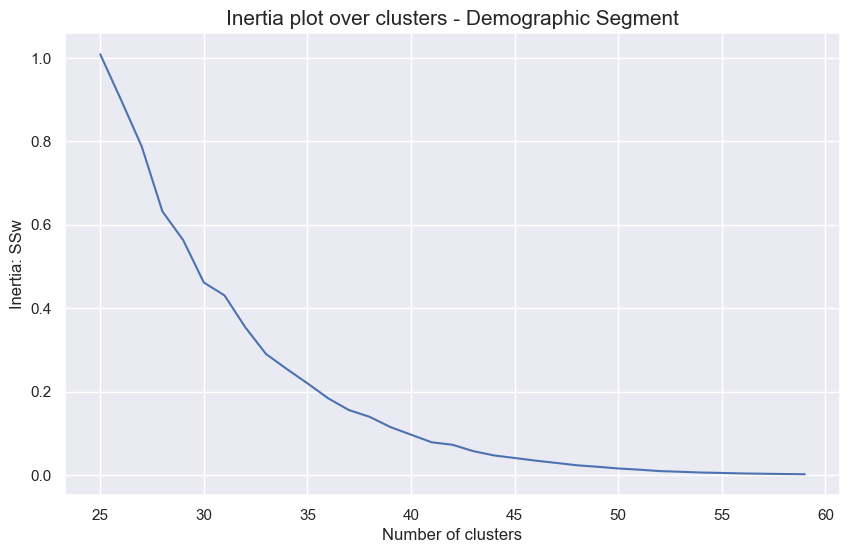

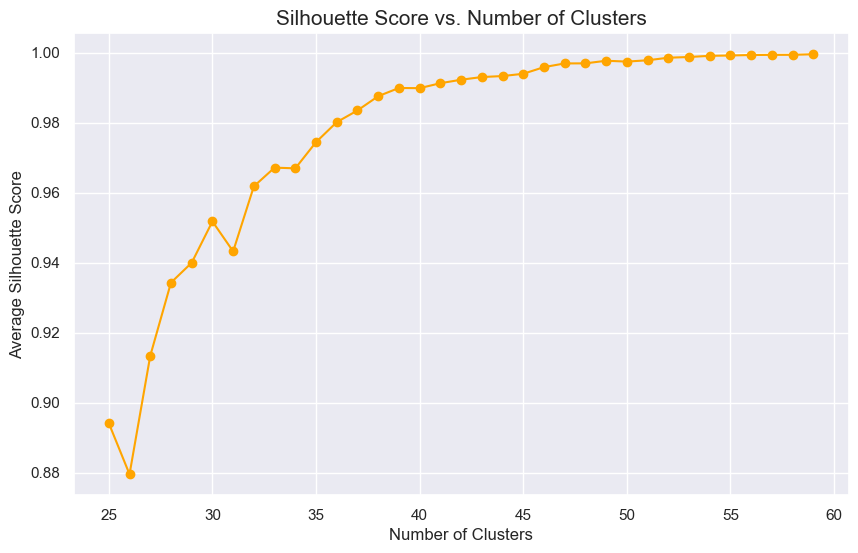

In [57]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Demographic Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [59]:
kmeans = KMeans(n_clusters=35, random_state=42)
kmeans_labels = kmeans.fit_predict(df_d[['customer_age']])
centroids_d = kmeans.cluster_centers_

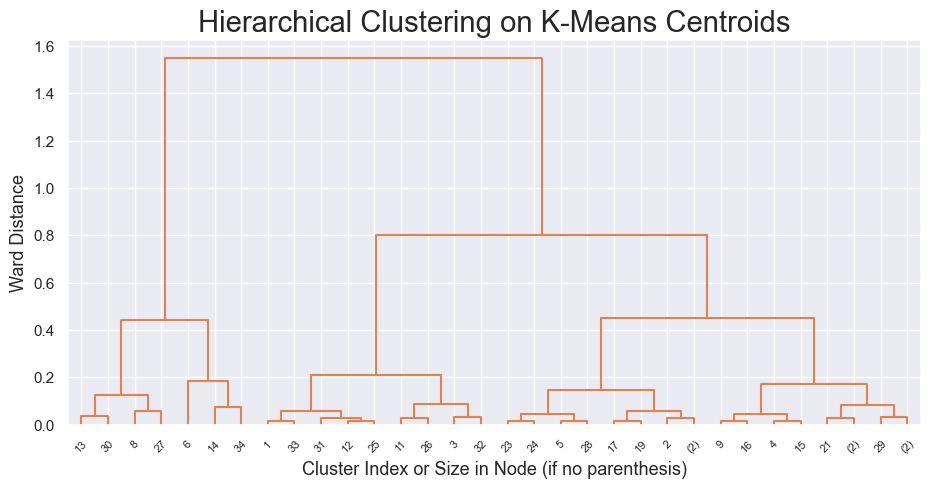

In [60]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_d)

# Prepare variables
n_samples = len(centroids_d)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [66]:
hclust = AgglomerativeClustering(
    n_clusters=5,  # Specify the desired number of clusters
    linkage="ward"
)

hierarchical_labels_d = hclust.fit_predict(df_d[["customer_age"]])

In [67]:
hierarchical_labels_d

array([4, 4, 1, ..., 0, 2, 2], dtype=int64)

In [68]:
silhouette_avg_d = silhouette_score(df_d[['customer_age']], hierarchical_labels_d)
print("The average silhouette score is :", silhouette_avg_d)

The average silhouette score is : 0.49705848138825065


# Psychographic Segment

In [72]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_p)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_p, cluster_labels)
    avg_silhouette.append(silhouette_avg)

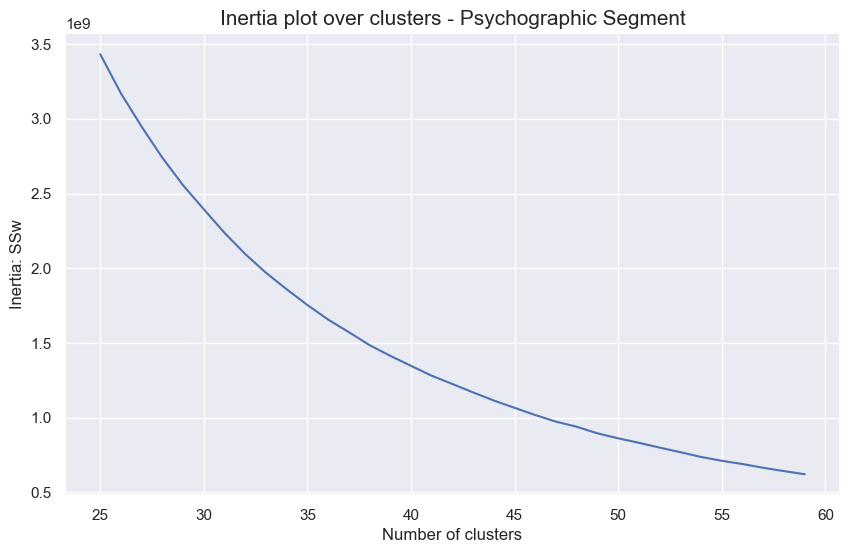

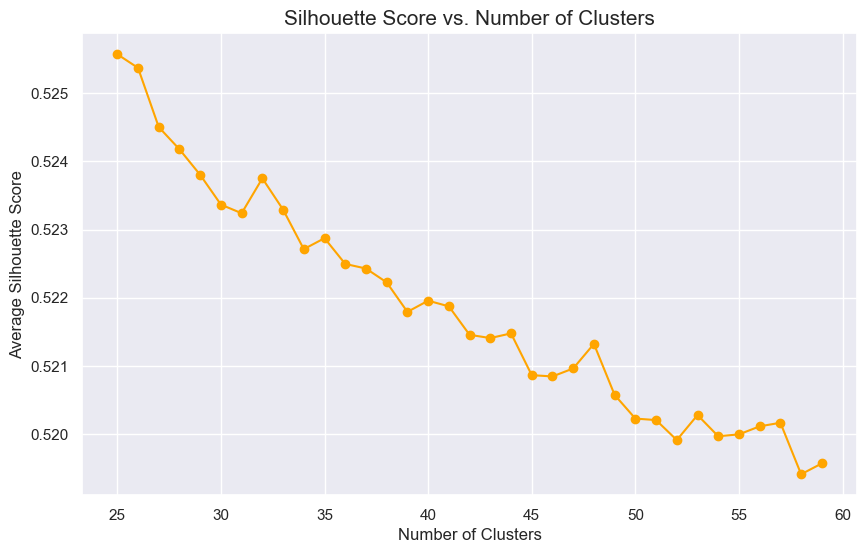

In [73]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Psychographic Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [74]:
kmeans = KMeans(n_clusters=40, random_state=42)
kmeans_labels = kmeans.fit_predict(df_p)
centroids_p = kmeans.cluster_centers_

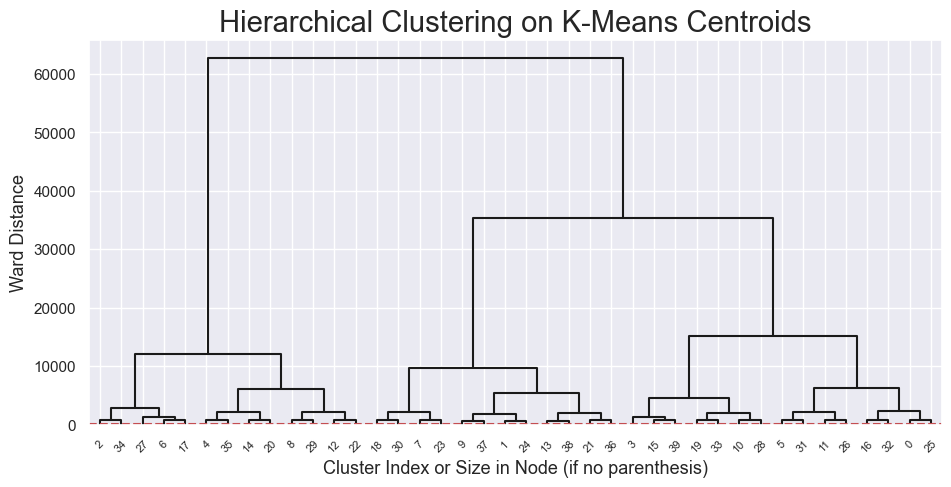

In [75]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_p)

# Prepare variables
n_samples = len(centroids_p)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [76]:
hclust = AgglomerativeClustering(
    n_clusters=5,  # Specify the desired number of clusters
    linkage="ward"
)

hierarchical_labels_p = hclust.fit_predict(df_p)

In [77]:
silhouette_avg_p = silhouette_score(df_p, hierarchical_labels_p)
print("The average silhouette score is :", silhouette_avg_p)

The average silhouette score is : 0.5280926897780152


# Results

In [83]:
silhouette_scores = [silhouette_avg_b, silhouette_avg_d, silhouette_avg_p]

segments = ['Behaviour', 'Demographic', 'Psychographic']

table = pd.DataFrame({
    'Segment': segments,
    'Silhouette Score': silhouette_scores
})

print(table)

         Segment  Silhouette Score
0      Behaviour          0.558483
1    Demographic          0.497058
2  Psychographic          0.528093
